**Домашнее задание 2, часть 2**

Для начала импортируем все нужные модули

In [1]:
import time
from pymorphy2 import MorphAnalyzer
from nltk.tokenize import word_tokenize
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import numpy as np
from nltk import draw

Считаем файл и сохраним список, хранящий все данные о первом разборе каждого слова в тексте

In [2]:
with open('Downloads/groza.txt', 'r', encoding='utf-8') as f:
    text = f.read()
    words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
morph = MorphAnalyzer()
morphs = []
lemmas = []
for i in range(len(words)):
    w = morph.parse(words[i])
    morphs.append(w)  # на всякий случай заведем разбор "нетронутым"
    wordform = w[0]   # сохраняем только первый вариант разбора
    lemmas.append({'wordform': wordform.word,
                      'normal_form': wordform.normal_form,
                      'pos': wordform.tag.POS,
                      'animacy': wordform.tag.animacy,
                      'aspect': wordform.tag.aspect,
                      'case': wordform.tag.case,
                      'gender': wordform.tag.gender,
                      'involvement': wordform.tag.involvement,
                      'mood': wordform.tag.mood,
                      'number': wordform.tag.number,
                      'person': wordform.tag.person,
                      'tense': wordform.tag.tense,
                      'transitivity': wordform.tag.transitivity,
                      'voice ': wordform.tag.voice
                     }) 

**Создание датафрейма**

Выстраиваем датафрейм по списку lemmas, выстраивая более удобную (на мой взгляд) очередность столбцов

In [3]:
colums = lemmas[0].keys()
dataframe = pd.DataFrame(lemmas).fillna('')
dataframe = dataframe[['wordform', 'normal_form', 'pos', 'animacy', 'aspect', \
                       'case', 'gender', 'involvement', 'mood', 'number', 'person', \
                       'tense', 'transitivity', 'voice ']]
dataframe

,wordform,normal_form,pos,animacy,aspect,case,gender,involvement,mood,number,person,tense,transitivity,voice
0,александр,александр,NOUN,anim,,nomn,masc,,,sing,,,,
1,николаевич,николай,NOUN,anim,,nomn,masc,,,sing,,,,
2,островский,островский,NOUN,anim,,nomn,masc,,,sing,,,,
3,гроза,гроза,NOUN,inan,,nomn,femn,,,sing,,,,
4,действие,действие,NOUN,inan,,nomn,neut,,,sing,,,,
5,первое,первое,NOUN,inan,,nomn,neut,,,sing,,,,
6,общественный,общественный,ADJF,,,nomn,masc,,,sing,,,,
7,сад,сад,NOUN,inan,,nomn,masc,,,sing,,,,
8,на,на,PREP,,,,,,,,,,,
9,высоком,высокий,ADJF,,,loct,masc,,,sing,,,,


**Построение графиков**

**Bar chart**

Для начала сделаем простой bar chart, который покажет нам топ-й0 используемых в тексте предлогов и число их употреблений в тексте

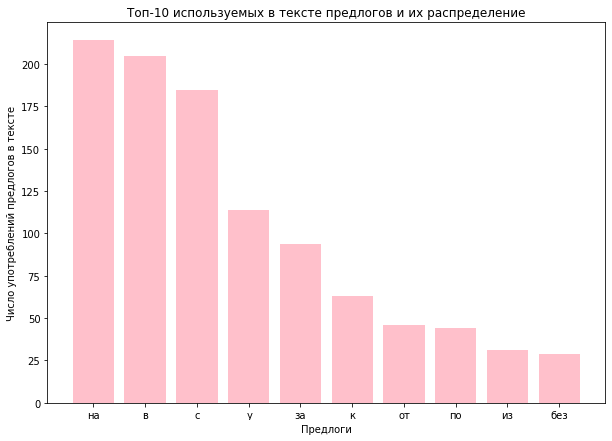

In [4]:
preps = {}
p = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    m = w.normal_form
    if w.tag.POS == 'PREP':
         p.append(m)
top_10_preps = Counter(p).most_common(10)
preps = dict(top_10_preps)
X = preps.keys()
Y = preps.values()
plt.figure(figsize = (10,7))
plt.bar(X, Y, color='pink')
plt.title('Топ-10 используемых в тексте предлогов и их распределение')
plt.xlabel('Предлоги')
plt.ylabel('Число употреблений предлогов в тексте')
plt.show()

**Pie chart**

Сделаем несложный pie chart, визуализирующий доли каждого из топ-10 междометий, употребляемых тексте
Мне захотелось посмотреть именно на междометия в "Грозе" А.Н.Островского из-за специфики речи некоторых персонажей

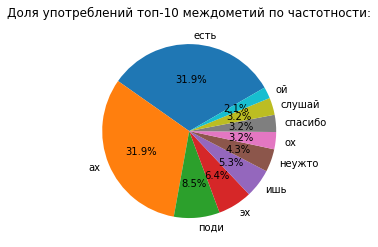

In [5]:
intjs = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'INTJ':
         intjs.append(w.normal_form)
top_10_intjs = Counter(intjs).most_common(10)
intj = []
nums = []
for tup in top_10_intjs:
    intj.append(tup[0])
    nums.append(tup[1])
plt.pie(nums, labels=intj, startangle=30, autopct='%1.1f%%');
plt.title('Доля употреблений топ-10 междометий по частотности:');

**Гистограмма**

Теперь посмотрим на среднюю длину леммы в тексте, предварительно обновив датасет так, как нам будет нужно

In [6]:
df2 = dataframe[['normal_form', 'pos', 'gender']].groupby(['normal_form', 'pos'], as_index=False).count()
df2.columns = ['normal_form', 'pos', 'total']
df2 = df2[df2['total'] > 10]

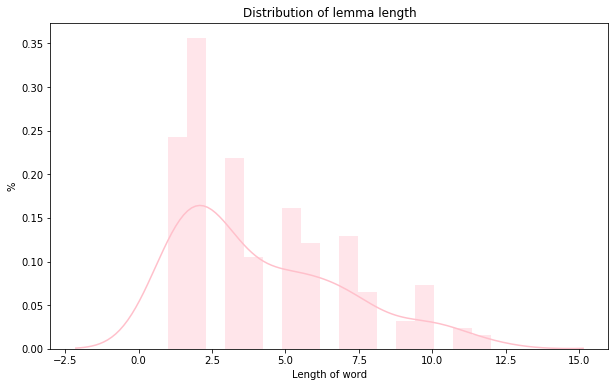

In [7]:
df2['length'] = dataframe['normal_form'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(df2['length'], bins=17, color='pink')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

**Немножко от себя**

Я видела красивые вордклауды в интернете, и мне захотелось сделать что-то похожее. Выглядит эффектнои "на глаз" понятно. Небольшой релакс для глаз)))

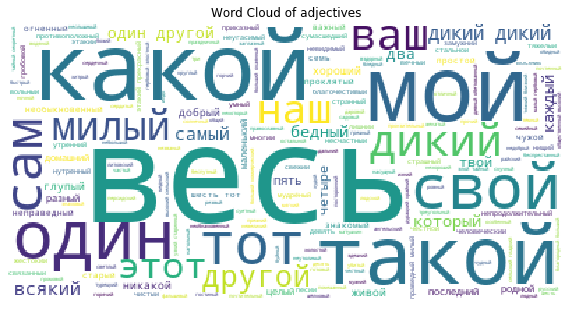

In [10]:
adjs = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'ADJF':
         adjs.append(w.normal_form)
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'ADJF':
        adjs.append(w.normal_form)
a = ' '.join(adjs)
wordcloud = WordCloud(
    background_color ='white',
    
).generate(a)
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('Word Cloud of adjectives')
plt.show()

Просто сопоставление употребления/неупотребления категории рода в русском языке за все произведение.

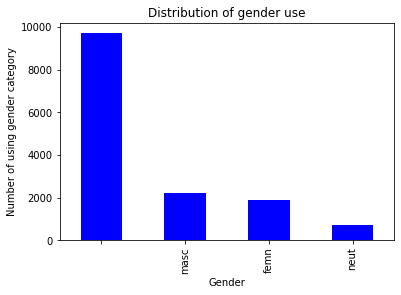

In [5]:
dataframe['gender'].value_counts().plot.bar(color='blue')
plt.title('Distribution of gender use')
plt.ylabel('Number of using gender category')
plt.xlabel('Gender');

Небольшой график, показывающий употребления глагола (рассматриваем параментры вид-число-род)

Text(0, 0.5, 'number of entries')

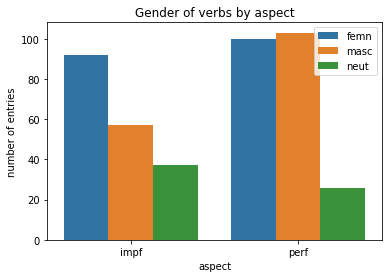

In [8]:
ndf = dataframe[ 
(dataframe['pos'] == 'VERB') 
][ 
['aspect', 'gender', 'number'] 
].groupby(['aspect', 'gender'], as_index=False).count() 
ndf['gender'] = ndf['gender'].map(str)
ndf['aspect'] = ndf['aspect'].map(str)
ndf.columns = ['aspect', 'gender', 'total'] 
ndf = ndf[ndf['gender'].map(str) != '']
sns.barplot(x="aspect", y="total", hue='gender', data=ndf) 
plt.legend(loc='best') # автоматический поиск места для легенды
plt.title('Gender of verbs by aspect') 
plt.xlabel('aspect') 
plt.ylabel('number of entries')

**Dispersion plot**

Возьмём двух главных героинь и посмотрим частоту их упоминаний

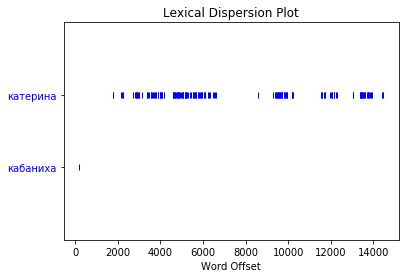

In [11]:
words = ['катерина', 'кабаниха']
draw.dispersion.dispersion_plot(dataframe['normal_form'], words, ignore_case=False, title="Lexical Dispersion Plot")

**(если что, это несерьёзно)** 

Поймём, "кто в доме хозяин" в "Грозе" в семье Кабановых (у кого больше упоминаний -> тот больше в центре внимания -> тот главнее)

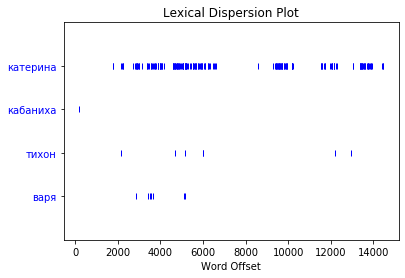

In [12]:
words = ['катерина', 'кабаниха', 'тихон', 'варя']
draw.dispersion.dispersion_plot(dataframe['normal_form'], words, ignore_case=False, title="Lexical Dispersion Plot")

Посмотрим

Я видела красивые вордклауды в интернете, и мне захотелось сделать что-то похожее. Информацию, как это сделать, нашла [здесь](https://www.datacamp.com/community/tutorials/wordcloud-python)
Мне очень хотелось посмотреть "в цвете", как прилагательные употребляются в тексте, вордклауд выглядит эффектно, "на глазок" можно примерно понять, как устроено употребление этой части речи в произведении, плюс миленько выглядит)
Но она в итоге не очень вышло, немножко не похоже на сердечко, но все равно вордклауд - это любовь

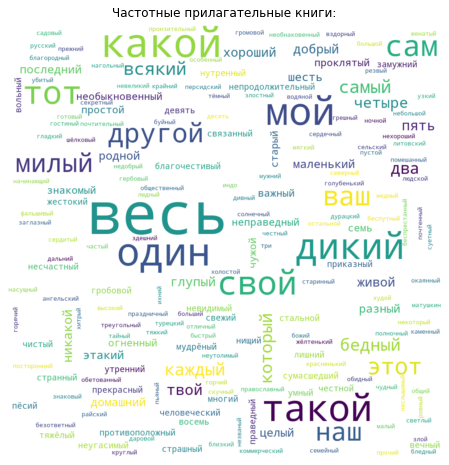

In [11]:
mask = np.array(Image.open('Downloads/4wc.png'))
adjs = []
for i in range(len(words)):
    w = morph.parse(words[i])[0]
    if w.tag.POS == 'ADJF':
         adjs.append(w.normal_form)
wordcloud = WordCloud(
    background_color ='white',
    mask=mask
    ).generate(' '.join(adjs));
plt.figure(figsize = (13, 8), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") 
plt.title('Частотные прилагательные книги:')
plt.show()